# Testing out sktime-dl

There is an issue with the sktime-dl library being dependant on an old sktime version. 


In [1]:
from sktime_dl.deeplearning import CNNClassifier, InceptionTimeClassifier, ResNetClassifier
import numpy as np
import pandas as pd
import os
import sys
import time as time
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(1, module_path + '/src')
import utility

import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix


from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 7, weight = 1000)
color_map = ['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500']
class_names = ['crackle', 'no-crackle']

In [7]:
X, y = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/crackleNoCrackle_no_rms.ts')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

labels_train, counts_train = np.unique(y_train, return_counts=True)
print(labels_train, counts_train)
labels_test, counts_test = np.unique(y_test, return_counts=True)
print(labels_test, counts_test)

['0' '1'] [3241 1757]
['0' '1'] [1106  561]


## Comments about time and performance

**InceptionTime** with default parameters used 6528 seconds to fit the data with only 10 samples 
Testing ways to shorten this time: 
* only 5 epochs --> result: Fitting time :  34 s, predicting time 689 s
* * This wont run on the entire dataset it seems

**ResNetClassifier** 
Fitting time for fixed 3000 : 5876 s
The accu

In [8]:
SMALL_NB_EPOCHS = 100
start = time.time()
network=CNNClassifier(nb_epochs=SMALL_NB_EPOCHS, verbose = True)
#network=InceptionTimeClassifier(nb_epochs=SMALL_NB_EPOCHS)
#network=ResNetClassifier(nb_epochs=SMALL_NB_EPOCHS)
network.fit(X_train, y_train)
print(f'Fitting time : {time.time() - start}')
start = time.time()
y_pred = network.predict(X_test)
print(f'Predicting time : {time.time() - start}')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20000, 1)]        0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 19994, 6)          48        
_________________________________________________________________
average_pooling1d_4 (Average (None, 6664, 6)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6658, 12)          516       
_________________________________________________________________
average_pooling1d_5 (Average (None, 2219, 12)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 26628)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 5325

Epoch 67/100
313/313 [==============================] - 31s 99ms/step - loss: 0.5000 - accuracy: 0.6504
Epoch 68/100
313/313 [==============================] - 31s 98ms/step - loss: 0.5000 - accuracy: 0.6442
Epoch 69/100
313/313 [==============================] - 31s 99ms/step - loss: 0.5000 - accuracy: 0.6494
Epoch 70/100
313/313 [==============================] - 31s 99ms/step - loss: 0.5000 - accuracy: 0.6523
Epoch 71/100
313/313 [==============================] - 31s 100ms/step - loss: 0.5000 - accuracy: 0.6502
Epoch 72/100
313/313 [==============================] - 31s 99ms/step - loss: 0.5000 - accuracy: 0.6571
Epoch 73/100
313/313 [==============================] - 31s 99ms/step - loss: 0.5000 - accuracy: 0.6504
Epoch 74/100
313/313 [==============================] - 31s 99ms/step - loss: 0.5000 - accuracy: 0.6414
Epoch 75/100
313/313 [==============================] - 31s 99ms/step - loss: 0.5000 - accuracy: 0.6544
Epoch 76/100
313/313 [==============================] - 31s 99m

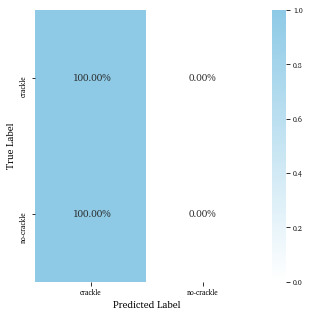

In [9]:
#print(classification_report(y_pred, y_test))
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(1,1) # 1 x 1 array , can also be any other size
f.set_size_inches(5, 5)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

colors_2 = ['#FFFFFF', color_map[0]]
cmap_name = 'my colormap'
cm_map = LinearSegmentedColormap.from_list(cmap_name, colors_2)

ax = sns.heatmap(cm, annot=True,
            fmt='.2%', cmap=cm_map, xticklabels=class_names,yticklabels=class_names )
cbar = ax.collections[0].colorbar
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
ax.set_ylabel('True Label', fontproperties = font)
ax.set_xlabel('Predicted Label', fontproperties = font)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font)
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_fontproperties(font_small)

# Saving and loading 

NB ! The loading part will need some more work

In [16]:
network.model.save(module_path + '/src/models/resNet_3000_crackle_no_crackle.h5')

In [14]:
from keras.models import load_model

test = load_model(module_path + '/src/models/models_h5/temp_model.h5')

In [3]:
import sktime_dl.deeplearning

help(sktime_dl.deeplearning)

Help on package sktime_dl.deeplearning in sktime_dl:

NAME
    sktime_dl.deeplearning

PACKAGE CONTENTS
    base (package)
    cnn (package)
    encoder (package)
    fcn (package)
    inceptiontime (package)
    lstm (package)
    mcdcnn (package)
    mcnn (package)
    mlp (package)
    resnet (package)
    rnn (package)
    tests (package)
    tlenet (package)
    twiesn (package)

CLASSES
    sktime_dl.deeplearning.base.estimators._classifier.BaseDeepClassifier(sktime.classification.base.BaseClassifier)
        sktime_dl.deeplearning.cnn._classifier.CNNClassifier(sktime_dl.deeplearning.base.estimators._classifier.BaseDeepClassifier, sktime_dl.deeplearning.cnn._base.CNNNetwork)
        sktime_dl.deeplearning.encoder._classifier.EncoderClassifier(sktime_dl.deeplearning.base.estimators._classifier.BaseDeepClassifier, sktime_dl.deeplearning.encoder._base.EncoderNetwork)
        sktime_dl.deeplearning.fcn._classifier.FCNClassifier(sktime_dl.deeplearning.base.estimators._classifier.BaseD